2021-10-29 Portfolio Value: 100000000.00
1
2019-11-29 Portfolio Value: 100000000.00
1 1
2
2019-12-31 Portfolio Value: 100654608.04
2 2
3
2020-01-31 Portfolio Value: 101529187.77
3 3
4
2020-02-28 Portfolio Value: 100365217.66
4 4
5
2020-03-31 Portfolio Value: 97911950.43
5 5
6
2020-03-31 Portfolio Value: 97911950.43
6 6
7
2020-04-30 Portfolio Value: 104352920.22
7 7
8
2020-05-29 Portfolio Value: 106004114.50
8 8
9
2020-06-30 Portfolio Value: 107131496.51
9 9
10
2020-07-31 Portfolio Value: 111477452.15
10 10
11
2020-08-31 Portfolio Value: 116550666.14
11 11
12
2020-09-30 Portfolio Value: 115884686.83
12 12
13
2020-10-30 Portfolio Value: 115577958.52
13 13
14
2020-11-30 Portfolio Value: 117877165.48
14 14
15
2020-12-31 Portfolio Value: 124030627.45
15 15
16
2021-01-29 Portfolio Value: 124881740.55
16 16
17
2021-02-26 Portfolio Value: 134074777.58
17 17
18
2021-03-31 Portfolio Value: 134201475.48
18 18
19
2021-04-30 Portfolio Value: 140591648.64
19 19
20
2021-05-31 Portfolio Value: 1413801

<IPython.core.display.Javascript object>


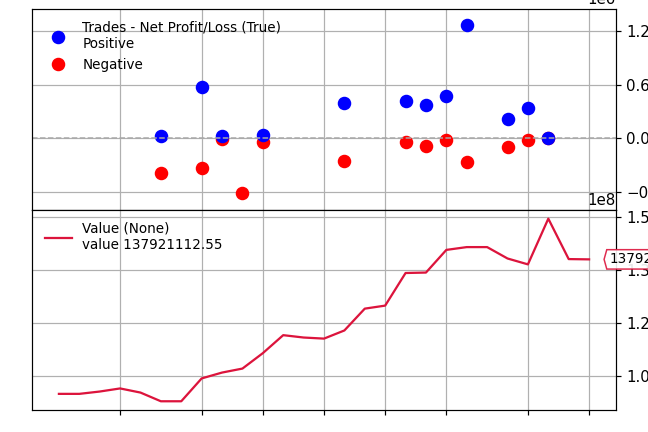

[[<Figure size 432x288 with 2 Axes>]]

In [35]:
from __future__ import (absolute_import,division,print_function,
                        unicode_literals)
import datetime
from dateutil.relativedelta import relativedelta
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from scipy.optimize import minimize
from pykalman import KalmanFilter
from arch.univariate import arch_model
import backtrader as bt

import DCC
import ARIMA
import stock_data_preprocessor as sdp
from covariance_matrix import covariance_matrix

end = datetime.date(2021, 10, 31)
start = end + relativedelta(months=-24)
class highest_sharpe_ratio(bt.Strategy):
    
    def __init__(self):
        today = self.data.datetime.date()
        self.weights = pd.read_csv('wgt.csv',index_col='Date',parse_dates=True)
        self.i = 0
        for column_name in self.weights.columns:
            ratio = self.weights[column_name].iloc[self.i]
            self.order_target_percent(target=ratio,data=column_name)
        print(today,'Portfolio Value: %.2f' % cerebro.broker.getvalue())


    def next(self):        
        today = self.data.datetime.date()
        if self.i<24:    
            self.i=self.i+1
        #print(self.i)
        for column_name in self.weights.columns:
            ratio = self.weights[column_name].iloc[self.i]
            self.order_target_percent(target=ratio,data=column_name)

        print(today,'Portfolio Value: %.2f' % cerebro.broker.getvalue())

        #print(self.i,self.i)

dummy_df = pd.read_csv('stock_data1/MMM.csv',
                       index_col='Date',
                       parse_dates=True)[start:end]
dummy_df.loc[:,:] = 0

# 1.creating a cerebro
cerebro = bt.Cerebro(stdstats=False)
cerebro.addobserver(bt.observers.Trades)
cerebro.addobserver(bt.observers.BuySell)
cerebro.addobserver(bt.observers.Value)
cerebro.broker.set_cash(100000000.0)
    
path1 = 'stock_data1/'
symbols = pd.read_csv('S&P500_ticker1.csv', usecols=['Symbol'])
for symbol in symbols.values:
    file_path = path1 + symbol[0] + '.csv'
    price_matrix = pd.read_csv(file_path,
                                index_col='Date',
                                parse_dates=True)[start:end]
    matrix_start = price_matrix.index[0]
    price_matrix = pd.concat([dummy_df[:matrix_start][1:], price_matrix])
    datafeed = bt.feeds.PandasData(dataname=price_matrix,plot=False)
    cerebro.adddata(datafeed,name=symbol[0])

# 3.add strategies
cerebro.addstrategy(highest_sharpe_ratio)
cerebro.addanalyzer(bt.analyzers.SharpeRatio)
cerebro.addanalyzer(bt.analyzers.DrawDown)
cerebro.addanalyzer(bt.analyzers.TradeAnalyzer)
    
# SP500.plot()
    
# 4.run
res = cerebro.run()[0]
print('Final Portfolio Value:',cerebro.broker.get_value())   

# 5.plot results
cerebro.plot(style='candle',volume=False)
